<a href="https://colab.research.google.com/github/shruti-7garg/2021-25/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HB(25).jpg to HB(25).jpg


In [ ]:
from PIL import Image
import io


In [ ]:
uploaded.keys()

dict_keys(['HB(25).jpg'])

In [ ]:
uploaded_file = list(uploaded.keys())[0]

In [ ]:
image = Image.open(io.BytesIO(uploaded[uploaded_file]))

In [ ]:
gray_image = image.convert('L')

In [ ]:
gray_image.show()

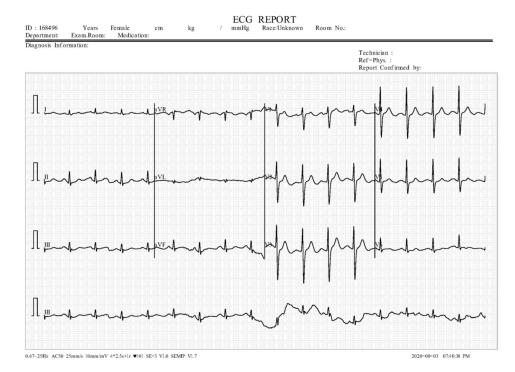

In [ ]:
import matplotlib.pyplot as plt

# Display the image inline
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
gray_image.save('processed_ecg_image.png')

In [ ]:
import numpy as np
from PIL import Image
from torchvision import transforms
import torch


In [ ]:
normalized_image = np.array(gray_image) / 255.0

In [ ]:
resized_image = gray_image.resize((224, 224))

In [ ]:

transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

augmented_image = transform(resized_image)


In [ ]:

image_array = np.array(resized_image).flatten()

In [ ]:

def extract_patches(image_array, patch_size):
    patches = []
    for i in range(0, image_array.shape[0] - patch_size + 1, patch_size):
        for j in range(0, image_array.shape[1] - patch_size + 1, patch_size):
            patches.append(image_array[i:i+patch_size, j:j+patch_size])
    return np.array(patches)

patches = extract_patches(np.array(resized_image), patch_size=16)


In [ ]:
tensor_data = torch.tensor(patches, dtype=torch.float32)

In [ ]:

attention_mask = torch.ones(tensor_data.shape[0])

In [ ]:
image_array = np.array(resized_image)

In [ ]:
tensor_data = torch.tensor(image_array, dtype=torch.float32).unsqueeze(0)

In [ ]:
rgb_image = gray_image.convert('RGB')


transform = transforms.ToTensor()
tensor_data = transform(rgb_image)

In [ ]:
tensor_data = tensor_data.unsqueeze(0)

In [ ]:

tensor_data /= 255.0

In [ ]:
from transformers import AutoFeatureExtractor, AutoModel

# Load a feature extractor and model for image classification
feature_extractor = AutoFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = AutoModel.from_pretrained('google/vit-base-patch16-224-in21k')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
tensor_data = tensor_data.to(device)

In [ ]:

desired_width = 224
desired_height = 224
resized_image = rgb_image.resize((desired_width, desired_height))

In [ ]:

transform = transforms.ToTensor()
tensor_data = transform(resized_image)

tensor_data = tensor_data.unsqueeze(0)

tensor_data /= 255.0

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor_data = tensor_data.to(device)


In [ ]:
from transformers import AutoFeatureExtractor, AutoModel

# Load model
feature_extractor = AutoFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = AutoModel.from_pretrained('google/vit-base-patch16-224-in21k')
model.to(device)

model.eval()
with torch.no_grad():
    outputs = model(pixel_values=tensor_data)

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:

print(type(outputs))
print(outputs)


<class 'transformers.modeling_outputs.BaseModelOutputWithPooling'>
BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1569,  0.0328, -0.0252,  ..., -0.0890,  0.0888,  0.0312],
         [ 0.2190,  0.1747,  0.0657,  ..., -0.1442,  0.1641, -0.0408],
         [ 0.4590,  0.1778, -0.0330,  ..., -0.2279,  0.2069,  0.2751],
         ...,
         [ 0.4078,  0.0703, -0.0748,  ..., -0.2501,  0.1915,  0.1336],
         [ 0.3738,  0.0993, -0.0788,  ..., -0.2482,  0.2284,  0.1353],
         [ 0.1832,  0.1366,  0.0014,  ..., -0.0613,  0.1801, -0.0547]]]), pooler_output=tensor([[ 9.8882e-02,  1.0944e-01, -3.2472e-01,  2.6243e-01, -6.3188e-01,
          3.7055e-01, -2.1659e-01,  4.2963e-01, -1.2149e-01, -4.4429e-01,
         -3.6276e-01,  2.6114e-01, -1.0668e-01,  1.8108e-01, -4.9446e-01,
          1.7489e-01, -9.8132e-02,  2.5947e-01, -3.9921e-01,  1.1971e-01,
          2.6054e-01, -3.1965e-01,  8.1992e-02,  1.9946e-01,  1.5449e-01,
          5.2317e-03, -8.1886e-02, -3.0711e-01,  9.9487e-02, 

In [ ]:

pooler_output = outputs.pooler_output


In [ ]:
import torch.nn as nn

class ClassificationHead(nn.Module):
    def __init__(self, hidden_size, num_classes):
        super(ClassificationHead, self).__init__()
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        return self.fc(x)

hidden_size = pooler_output.size(-1)
num_classes = 2

classification_head = ClassificationHead(hidden_size, num_classes)
logits = classification_head(pooler_output)


In [ ]:
import torch.nn.functional as F

probabilities = F.softmax(logits, dim=-1)

predicted_class = torch.argmax(probabilities, dim=-1).item()

# Map to class labels
class_labels = ['Healthy', 'Disease']
predicted_label = class_labels[predicted_class]

print(f'Prediction: {predicted_label} (Probability: {probabilities.max().item():.2f})')


Prediction: Healthy (Probability: 0.54)


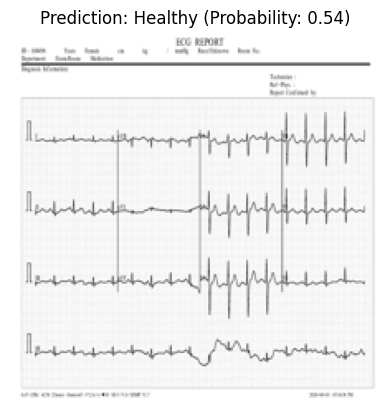

In [ ]:

#  image and prediction
plt.imshow(resized_image)
plt.title(f'Prediction: {predicted_label} (Probability: {probabilities.max().item():.2f})')
plt.axis('off')
plt.show()


In [ ]:

print(type(outputs))
print(outputs)


<class 'transformers.modeling_outputs.BaseModelOutputWithPooling'>
BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1578,  0.0324, -0.0249,  ..., -0.0903,  0.0900,  0.0311],
         [ 0.2211,  0.1735,  0.0658,  ..., -0.1452,  0.1654, -0.0408],
         [ 0.4592,  0.1753, -0.0332,  ..., -0.2281,  0.2076,  0.2728],
         ...,
         [ 0.4083,  0.0689, -0.0745,  ..., -0.2525,  0.1955,  0.1361],
         [ 0.3734,  0.0997, -0.0775,  ..., -0.2481,  0.2317,  0.1346],
         [ 0.1869,  0.1362,  0.0018,  ..., -0.0640,  0.1804, -0.0536]]]), pooler_output=tensor([[ 9.6735e-02,  1.1180e-01, -3.2319e-01,  2.6224e-01, -6.3224e-01,
          3.7249e-01, -2.1728e-01,  4.2970e-01, -1.2178e-01, -4.4417e-01,
         -3.6254e-01,  2.6215e-01, -1.0505e-01,  1.8206e-01, -4.9334e-01,
          1.7544e-01, -1.0344e-01,  2.6163e-01, -3.9785e-01,  1.1728e-01,
          2.5853e-01, -3.1804e-01,  7.9825e-02,  1.9799e-01,  1.5292e-01,
          6.5822e-03, -8.2026e-02, -3.0557e-01,  1.0060e-01, 